In [1]:
%matplotlib inline

In [112]:
import sys
import matplotlib.pyplot as plt
import importlib
import graph
import graph_collection

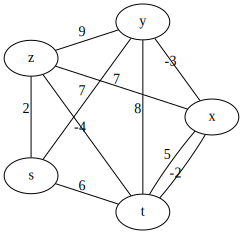

In [140]:
importlib.reload(graph)
importlib.reload(graph_collection)
from graph_collection import G1
g = G1()
g.as_graphiz()

In [141]:
import networkx as nx

In [142]:
import sys

w = g.adj_matrix()  
n = len(w)    

for i in range(n):
    for j in range(n):
        if i == j:
            w[i][j] = 0
        elif w[i][j] is None:
            w[i][j] = sys.maxsize        
l = [[sys.maxsize if i != j else 0 for i in range(n)] for j in range(n)]                  

In [ ]:
!conda install -y graphviz

In [ ]:
!pip install graphviz

In [143]:
def extend_paths(L, W):
    n = len(W)        
    l_ = [ [sys.maxsize for i in range(n)] for j in range(n)]        
    for i in range(n):
        for j in range(n):
            for k in range(n):
                l_[i][j] = min(l_[i][j], L[i][k] + W[k][j])
    return l_

In [160]:
l = extend_paths(l, w)
print_out(l)

0,0,0.00
0,1,-2.00
0,2,5.00
0,3,2.00
0,4,-4.00
1,0,2.00
1,1,0.00
1,2,7.00
1,3,4.00
1,4,-2.00
2,0,-5.00
2,1,-7.00
2,2,0.00
2,3,-3.00
2,4,-9.00
3,0,-2.00
3,1,-4.00
3,2,3.00
3,3,0.00
3,4,-6.00
4,0,4.00
4,1,2.00
4,2,9.00
4,3,6.00
4,4,0.00


In [155]:
def print_out(a):
    n = len(a)
    for i in range(n):
        for j in range(n):
            print("%s,%s,%.2f" % (i, j, a[i][j]))

--- 

Restore predecessor matrix from the shorest path matrix in $O(n^3)$

In [ ]:
def predecessor_from_distance(d, w):
    n = len(d)
    pi = [[None for i in range(n)] for j in range(n)]
    for i in range(n):
        for j in range(n):
            if i == j:
                pi[i][j] = None
            else:
                pi[i][j] = i
                for k in range(n):
                    if w[k][j] is not None \
                    and k != j \
                    and d[i][k] is not None \
                    and d[i][j] is not None \
                    and d[i][j] == d[i][k] + w[k][j]:
                        pi[i][j] = k                    
    return pi
                        

In [ ]:
d = [[0, 4, 4, 3],[3,0,7,6], [6,3,0,2],[4,1,1,0]]
w = [[0, None, 6, 3], [3, 0, None, None], [None, None, 0, 2], [None, 1, 1, 0]]

In [ ]:
predecessor_from_distance(d,w)